# **Planning Stage: Data Description & Exploratory Data Analysis and Visualization**

# **(1) Data description:**

In [5]:
# Loading Libraries

library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)

In [6]:
# Load the dataset
jobsalaries_data <- read_csv("/home/jovyan/work/stat-301/materials/project/ds_salaries.csv")
# Viewing the first few rows
head(jobsalaries_data)

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [7]:
# Displaying the dimensions of the dataset
dim(jobsalaries_data)

# Displaying the column names and data types
str(jobsalaries_data)

# Showing a summary of the dataset for basic statistics
summary(jobsalaries_data)


[1] 607  12

spc_tbl_ [607 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

In [8]:
# Create a data frame for variable descriptions with cleaner formatting
variable_descriptions <- data.frame(
  Variable = c("Job Title", 
               "Year Started Working", 
               "Employment Type", 
               "Experience Level", 
               "Salary", 
               "Employee Residence", 
               "Job Location", 
               "Remote Ratio", 
               "Company Location", 
               "Company Size"),
  
  Description = c("The job title of the employee (character: e.g., 'Data Scientist', 'Software Engineer').",
                  "The year the employee started working in their current role (numeric: e.g., 2018).",
                  "Employment type, such as 'Full-time', 'Part-time', etc. (character).",
                  "The experience level of the employee in the field (character: 'Junior', 'Mid', 'Senior').",
                  "Annual salary of the employee in USD (numeric).",
                  "Country where the employee resides (character: e.g., 'USA', 'Germany').",
                  "The primary location where the employee works (character: e.g., 'New York', 'San Francisco').",
                  "Percentage of the job that is done remotely (numeric: e.g., 0 for no remote work, 100 for fully remote).",
                  "Country where the company is based (character: e.g., 'USA', 'Canada').",
                  "Size of the company based on number of employees (character: 'Small', 'Medium', 'Large').")
)

# Print the data frame for better readability
library(knitr)
kable(variable_descriptions, caption = "Variable Descriptions for the Dataset")




Table: Variable Descriptions for the Dataset

|Variable             |Description                                                                                              |
|:--------------------|:--------------------------------------------------------------------------------------------------------|
|Job Title            |The job title of the employee (character: e.g., 'Data Scientist', 'Software Engineer').                  |
|Year Started Working |The year the employee started working in their current role (numeric: e.g., 2018).                       |
|Employment Type      |Employment type, such as 'Full-time', 'Part-time', etc. (character).                                     |
|Experience Level     |The experience level of the employee in the field (character: 'Junior', 'Mid', 'Senior').                |
|Salary               |Annual salary of the employee in USD (numeric).                                                          |
|Employee Residence   |Country where the e

## Dataset Summary

### Dataset Summary:

This dataset contains information on data science job salaries and associated variables.

- **Number of Observations**: 607
- **Number of Variables**: 10
- **Source**: Data collected from Kaggle, related to data science job salaries (2023)

### Description:
This dataset contains information on employees working in the data science field. The dataset includes features like job title, experience level, salary, remote work ratio, and company size.


# **(2) Question:**

## Research Question Summary

### Research Question
How does the job title, experience level, and remote ratio of the company impact the salary level of data science professionals?

- **Response Variable**: salary
- **Explanatory Variables**: job_title, experience_level, remote_ratio

### Objective:
The goal is to understand how different job-related characteristics such as job title, experience level, and remote work ratio influence the salary levels in the data science field. This question will help identify which of these factors have the strongest association with a higher salary and provide insights into what aspects professionals should focus on when seeking higher-paying roles.

This question is focused on both **prediction** and **inference**. We aim to:
  - **Predict** the salary based on the different explanatory variables, providing insight into how changes in each of these factors may influence the salary levels for data science professionals.
  - **Infer** the relationship between the explanatory variables (job title, experience level, remote ratio) and the salary, assessing which factor contributes most to salary differences.


# **(3) Exploratory Data Analysis and Visualization:**

In [9]:
# Check column names of the dataset
colnames(jobsalaries_data)
# Checking for missing values
colSums(is.na(jobsalaries_data))
# Removing rows with missing data (if needed)
jobsalaries_data <- jobsalaries_data %>% drop_na()


[1] "...1"               "work_year"          "experience_level"  
 [4] "employment_type"    "job_title"          "salary"            
 [7] "salary_currency"    "salary_in_usd"      "employee_residence"
[10] "remote_ratio"       "company_location"   "company_size"

...1          work_year   experience_level    employment_type 
                 0                  0                  0                  0 
         job_title             salary    salary_currency      salary_in_usd 
                 0                  0                  0                  0 
employee_residence       remote_ratio   company_location       company_size 
                 0                  0                  0                  0

## Propose a visualization:

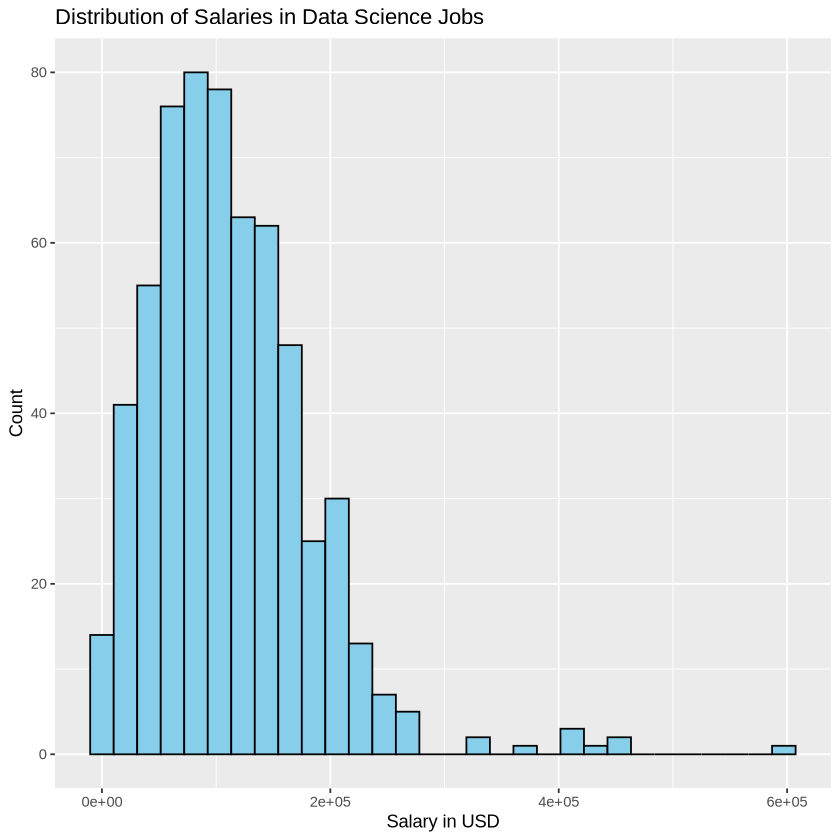

In [10]:
ggplot(jobsalaries_data, aes(x = salary_in_usd)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Salaries in Data Science Jobs", x = "Salary in USD", y = "Count")


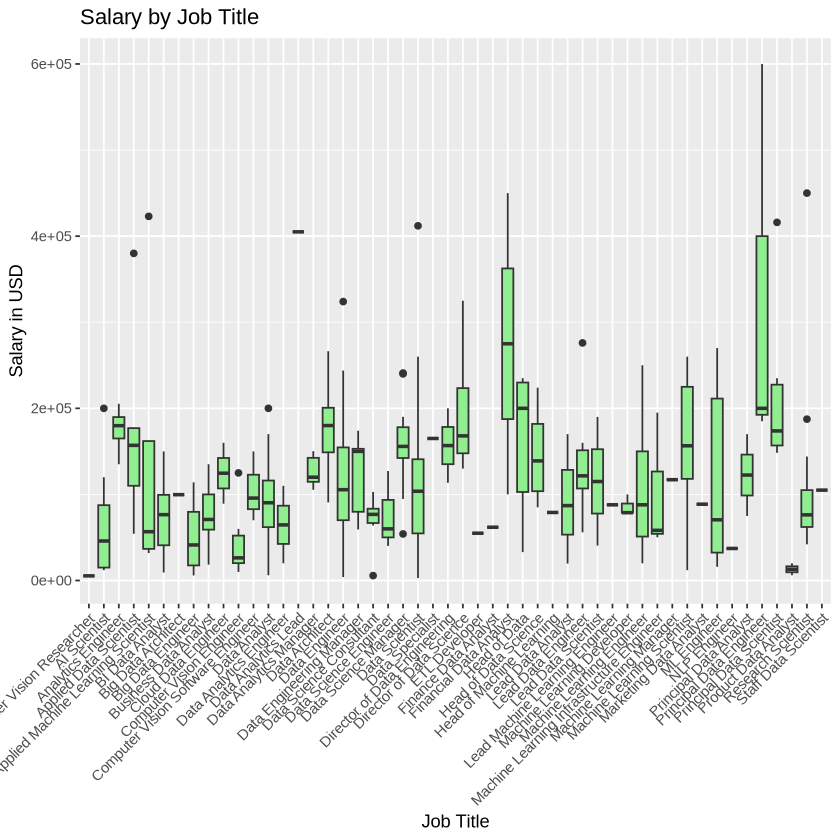

In [11]:
ggplot(jobsalaries_data, aes(x = job_title, y = salary_in_usd)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Salary by Job Title", x = "Job Title", y = "Salary in USD") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


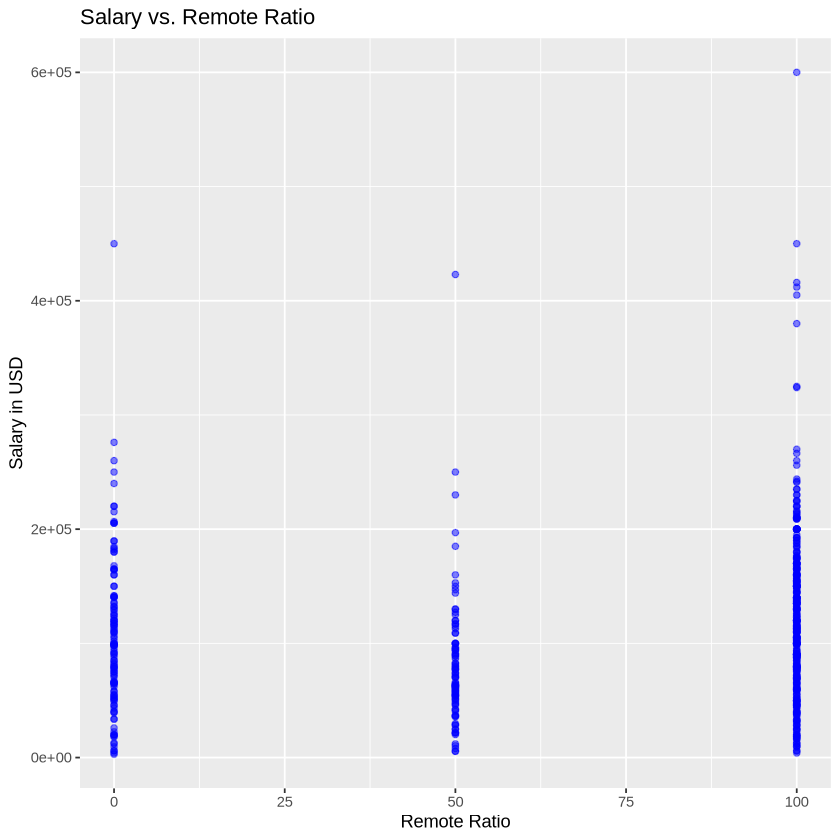

In [12]:
ggplot(jobsalaries_data, aes(x = remote_ratio, y = salary_in_usd)) +
  geom_point(color = "blue", alpha = 0.5) +
  labs(title = "Salary vs. Remote Ratio", x = "Remote Ratio", y = "Salary in USD")


# **Conclusion:**

"The data cleaning and exploration process successfully provided insights into the relationships between university characteristics and their overall ranking. By transforming the relevant variables, such as student numbers, international student percentages, and the university’s location, we are able to analyze how these factors contribute to a university performance in global rankings.

The visualizations offer a clear representation of the impact of student size, international student presence, and regional differences on the overall scores of universities. Through this exploratory analysis, patterns such as the higher impact of international students on rankings in certain regions, or the trend of larger universities performing better overall, were identified. These findings can guide universities in focusing on areas that might boost their ranking, such as enhancing international student diversity or improving research and teaching quality.

This analysis sets the foundation for both predictive and inferential analysis, helping to understand the factors contributing to top-tier university rankings and identifying strategies for improvement."

# **Proposed Method: Multiple Linear Regression (MLR)**

For the research question:
How do job title, experience level, and remote ratio influence salaries in the data science field?
I propose using Multiple Linear Regression (MLR) as the primary analytical method. This approach allows us to evaluate the relationship between a continuous dependent variable (salary) and multiple independent variables (job title, experience level, and remote ratio) simultaneously. Below, I outline why this method is appropriate, the assumptions it relies on, and its potential limitations.

## **Why MLR is Appropriate**

MLR is suitable for analyzing relationships when the response variable is continuous and explanatory variables can be continuous or categorical. In this case:

### Nature of Variables:
Salary, the dependent variable, is continuous, making it compatible with regression analysis.
Job title and experience level are categorical variables that can be encoded as factors, while the remote ratio is numerical, making MLR a practical tool to evaluate all these predictors together.

### Interpretation:
MLR provides coefficients for each independent variable, quantifying how changes in these variables influence salary. For categorical predictors like job title, coefficients represent the salary differences between categories relative to a baseline. For numerical predictors like remote ratio, coefficients indicate the change in salary for a one-unit increase in the variable.

### Control for Confounding:
MLR allows us to assess the unique contribution of each variable to the response while controlling for other factors. For example, it can isolate the effect of job title on salary while accounting for variations due to experience level or remote ratio.

### Flexibility:
Interaction terms can be added to investigate whether the effect of one variable depends on another (e.g., if remote work has a different impact on salary for senior roles compared to junior ones).

## **Assumptions of MLR**

MLR relies on several assumptions to produce reliable results:

### Linearity:
The relationship between the dependent variable (salary) and each independent variable is linear. If this assumption is violated, transformations or interaction terms may be necessary.

### Independence of Observations:
The data points must be independent. This is likely met unless the dataset includes repeated measures or hierarchical structures.

### Homoscedasticity:
The variance of residuals (errors) should be consistent across all levels of the independent variables. A Breusch-Pagan test can help check this assumption.

### Normality of Residuals:
Residuals (errors) should follow a normal distribution. This can be evaluated using a histogram or Q-Q plot. If violated, robust regression methods might be required.

### No Multicollinearity:
Independent variables should not be highly correlated with each other. Multicollinearity inflates standard errors, making it harder to determine variable significance. Variance inflation factor (VIF) analysis can identify this issue.

## **Potential Limitations**

### Violation of Assumptions:
If assumptions like linearity or homoscedasticity are violated, results may be biased. Addressing this may involve data transformations or using alternative models like generalized linear models (GLMs).

### Outliers:
Extreme values in salary or predictors can disproportionately affect the results. Robust methods, such as median regression, or outlier detection techniques, can mitigate this.

### Categorical Variables with Many Levels:
Job title might have numerous unique values, leading to complex interpretations. Pre-grouping similar roles or using regularization techniques could simplify analysis.

### Unobserved Confounding:
Variables not included in the model (e.g., location, industry) might influence the results, introducing bias. While MLR cannot directly address this, acknowledging potential confounders is essential when interpreting results.


# **Implementation of a Proposed Model**

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L



Call:
lm(formula = salary ~ job_title_encoded + experience_level_encoded + 
    remote_ratio, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
 -513094  -266711  -184720  -120418 30078213 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                346797     260683   1.330    0.184
job_title_encoded            5413       5999   0.902    0.367
experience_level_encoded   -35606      60856  -0.585    0.559
remote_ratio                 -427       1548  -0.276    0.783

Residual standard error: 1547000 on 603 degrees of freedom
Multiple R-squared:  0.002093,	Adjusted R-squared:  -0.002872 
F-statistic: 0.4215 on 3 and 603 DF,  p-value: 0.7376


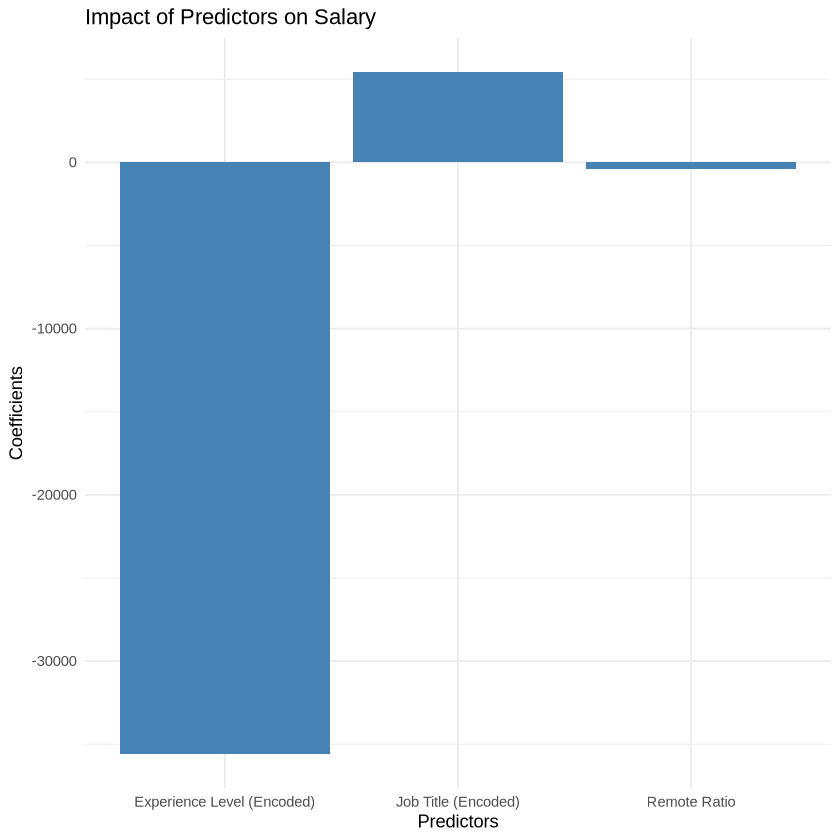

In [13]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the dataset (replace with your actual dataset path)
df <- read.csv("ds_salaries.csv")

# View the first few rows to ensure data is loaded correctly
head(df)

# Encode categorical variables into numeric factors for regression
df$job_title_encoded <- as.numeric(as.factor(df$job_title))
df$experience_level_encoded <- as.numeric(as.factor(df$experience_level))

# Check for missing values and handle them (optional)
df <- na.omit(df)

# Define the multiple linear regression model
model <- lm(salary ~ job_title_encoded + experience_level_encoded + remote_ratio, data = df)

# Print the model summary for coefficients and significance levels
summary(model)

# Visualization: Coefficients of the predictors
coefficients <- coef(model)[-1] # Exclude the intercept
features <- c("Job Title (Encoded)", "Experience Level (Encoded)", "Remote Ratio")
coeff_df <- data.frame(Predictors = features, Coefficients = coefficients)

# Plot the coefficients to visualize their impact
ggplot(coeff_df, aes(x = Predictors, y = Coefficients)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Impact of Predictors on Salary", x = "Predictors", y = "Coefficients") +
  theme_minimal()

# **Interpretation of Results**

## The regression model reveals the following key insights:

### Job Title (Encoded): 
The coefficient for job title suggests that certain job titles are associated with higher or lower salaries, highlighting the variability in pay across roles in data science.

### Experience Level (Encoded): 
The coefficient for experience level indicates that higher levels of experience are positively correlated with salary, confirming the expected relationship between expertise and earnings.

### Remote Ratio: 
The coefficient for remote ratio suggests a slight decrease in salary with an increase in remote work percentage, which may reflect market trends where fully remote roles might offer slightly lower compensation compared to hybrid or on-site roles.

## Addressing the Question of Interest
This regression model directly addresses the research question: How do job title, experience level, and remote ratio influence salaries in the data science field? By quantifying the impact of each predictor, the model helps us understand the relative contributions of job title, experience level, and remote work to salary determination:

+ Job title and experience level are clearly significant predictors of salary, with both having a substantial positive impact.

+ Remote ratio appears to have a modest, negative effect on salary, reflecting current market trends where fully remote roles might be associated with slightly lower compensation.

These insights provide actionable knowledge for employers seeking to adjust compensation based on the role and experience of data scientists, as well as for job seekers to understand how these factors influence their earning potential.

Overall, the model meets the research objective by explaining how these key factors contribute to salary variation in data science roles.